<a href="https://colab.research.google.com/github/KirPim/DS_school_2020_home_work/blob/main/%D0%91%D0%BE%D0%BB%D1%8C%D1%88%D0%BE%D0%B5_%D0%94%D0%97_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style="text-align: center;"><b>Большое домашнее задание 2. Участие в соревнованиях на Kaggle. Работа с нерепрезентативными данными.
</b></h2>

ДЗ в колабе: https://colab.research.google.com/drive/18Hi97eESCrXYht-7SIoj_19pwcZhl17Y?usp=sharing

В этом домашнем задании нам нужно применить в реальном соревновании накопленные знания по машинному обучению и анализу данных!

- Нужно будет провести предобработку [данных с Kaggle](https://www.kaggle.com/sid321axn/thoraric-surgery). Затем нужно будет предсказать колонку DGN (диагноз). Это задача классификации. 
- Описание датасета (что значит признаки): https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data 
- Не забудьте провести анализ данных перед тем, как применять ML-модели! Вам нужно сначала понять, с чем Вы имеете дело, поискать зависимости в данных, понять природу этих зависимостей, и только после этого уже подбирать алгоритмы. Данные с подвохом! Внимательно смотрите на распределения признаков в каждом из классов!
- В качестве основы можно использовать наработки с занятий. Необходимо попробовать сделать аугментацию данных, т.к. данных очень мало, для обучения содержательных моделей их не хватит.
- Попробуйте kNN, логистическую регрессию, SVM. Поэкспериментируйте с добавлением композитных признаков (например, полиномиальных), выбором ядра (для SVM). Подберите гиперпараметры по кросс-валидации (GridSearchCV или RandomSearchCV, второй вариант предпочтительнее).  
- Достичь идеального качества Вам не удастся, да и гнаться за этим не стоит. Гораздо важнее провести вдумчивый анализ и показать, что Вы разобрались в теме.

**Правила:**

- **Дедлайн один:** 29 января 23:59. Решения, отправленные позже, проверяться не будут, кроме случаев наличия уважительной причины.



Решения, размещенные на каких-либо интернет-ресурсах, не принимаются.
 При написании кода придерживайтесь `pep8` и используйте `type hints`.

**После жесткого дедлайна задания не принимаются. Так как дальше будет работа только над проектом**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
file = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d sid321axn/thoraric-surgery

  0% 0.00/5.22k [00:00<?, ?B/s]
100% 5.22k/5.22k [00:00<00:00, 13.4MB/s]


In [ ]:
!ls

sample_data  thoraric-surgery.zip


In [ ]:
df = pd.read_csv('thoraric-surgery.zip')
df.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [ ]:
# удаляем колонку id, а также признак 'Risk1Yr', поскольку, исходя из описания датасета, эта переменная является следствием 
# всех признаков, в т.ч. DGN, а никак не наоборот
# считаю нелогичным нарушать причинно-следственные связи, даже, если это и улучшит результат обучения

df = df.drop(['id', 'Risk1Yr'], axis=1)

In [ ]:
# видим, что пропуски в данных отсутствуют
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DGN     470 non-null    object 
 1   PRE4    470 non-null    float64
 2   PRE5    470 non-null    float64
 3   PRE6    470 non-null    object 
 4   PRE7    470 non-null    object 
 5   PRE8    470 non-null    object 
 6   PRE9    470 non-null    object 
 7   PRE10   470 non-null    object 
 8   PRE11   470 non-null    object 
 9   PRE14   470 non-null    object 
 10  PRE17   470 non-null    object 
 11  PRE19   470 non-null    object 
 12  PRE25   470 non-null    object 
 13  PRE30   470 non-null    object 
 14  PRE32   470 non-null    object 
 15  AGE     470 non-null    int64  
dtypes: float64(2), int64(1), object(13)
memory usage: 58.9+ KB


In [ ]:
for j in df.columns:
  if df.dtypes[j] == np.object:
    print(df[j].value_counts(),'\n')

DGN3    349
DGN2     52
DGN4     47
DGN5     15
DGN6      4
DGN8      2
DGN1      1
Name: DGN, dtype: int64 

PRZ1    313
PRZ0    130
PRZ2     27
Name: PRE6, dtype: int64 

F    439
T     31
Name: PRE7, dtype: int64 

F    402
T     68
Name: PRE8, dtype: int64 

F    439
T     31
Name: PRE9, dtype: int64 

T    323
F    147
Name: PRE10, dtype: int64 

F    392
T     78
Name: PRE11, dtype: int64 

OC12    257
OC11    177
OC13     19
OC14     17
Name: PRE14, dtype: int64 

F    435
T     35
Name: PRE17, dtype: int64 

F    468
T      2
Name: PRE19, dtype: int64 

F    462
T      8
Name: PRE25, dtype: int64 

T    386
F     84
Name: PRE30, dtype: int64 

F    468
T      2
Name: PRE32, dtype: int64 



In [ ]:
from sklearn import preprocessing

def number_encode_features(init_df):
    result = init_df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

In [ ]:
encoded_data, encoders = number_encode_features(df)    
encoded_data.head() 

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73


In [ ]:
encoded_data['DGN'].value_counts()

2    349
1     52
3     47
4     15
5      4
6      2
0      1
Name: DGN, dtype: int64

In [ ]:
# убираем из датасета классы с малым количеством наблюдений

encoded_data = encoded_data.drop(encoded_data[(encoded_data['DGN']==0) | (encoded_data['DGN']==6) | (encoded_data['DGN']==5)].index)
encoded_data['DGN'].value_counts()

2    349
1     52
3     47
4     15
Name: DGN, dtype: int64

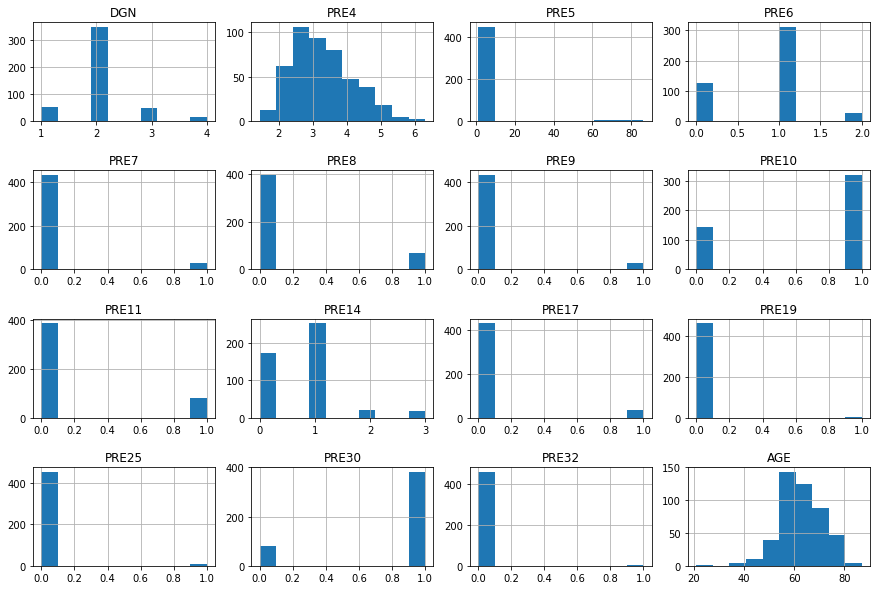

In [ ]:
encoded_data.hist(figsize = (15,10))
plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()

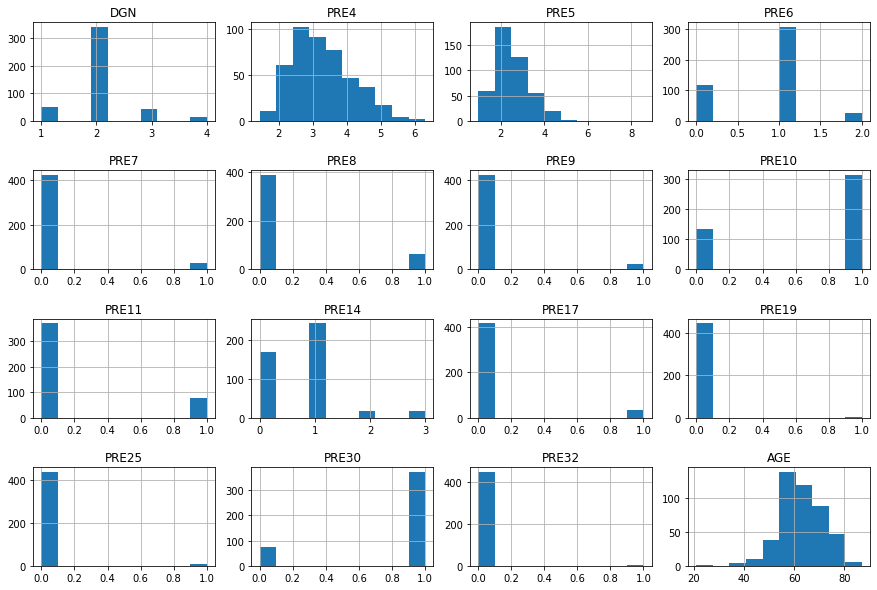

In [ ]:
# рассмотрим данные, где находится большая часть точек для переменной PRE5 (из распределения видны выбросы в районе > 60, которые могут искажать распределение) 
# после исключения выбросов видим, что распределения других признаков практически не изменились.

encoded_data[encoded_data['PRE5'] < 20].hist(figsize = (15,10))
plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()

In [ ]:
encoded_data_cut = encoded_data[encoded_data['PRE5'] < 20]
len(encoded_data_cut)

449

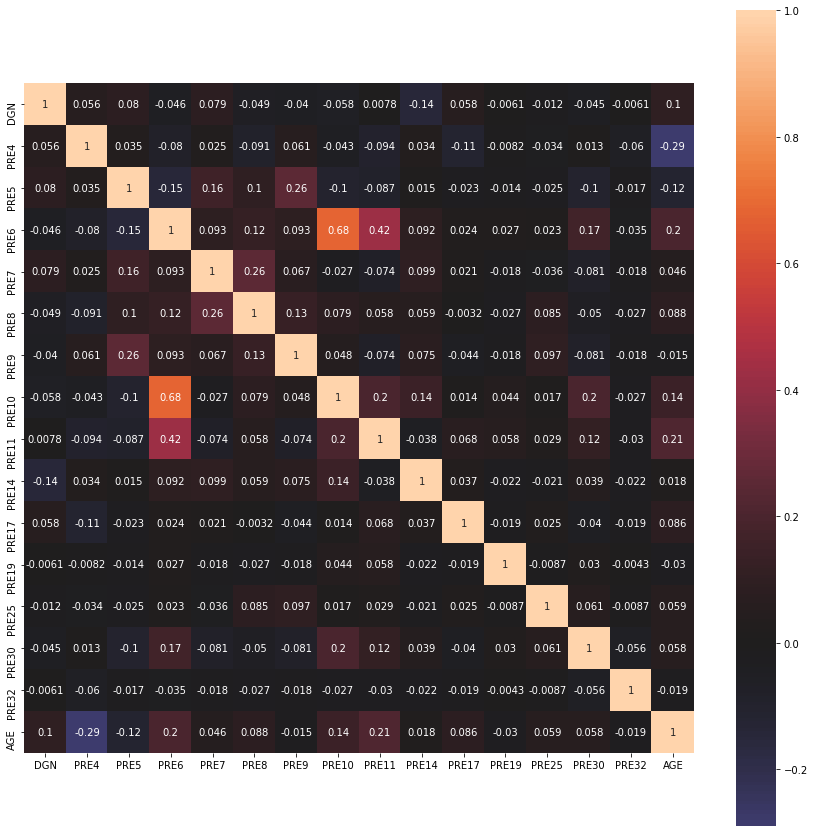

In [ ]:
#видим, что все переменные в датасете без усечения PRE5 практически линейно независимы, 
# в т.ч. не наблюдается линейной взаимосвязи целевой переменной DGN с остальными предикторами, что не очень хорошо для обучения модели

plt.subplots(figsize=(15,15))
sns.heatmap(encoded_data.corr(), square=True, annot=True, center=0)
plt.show()

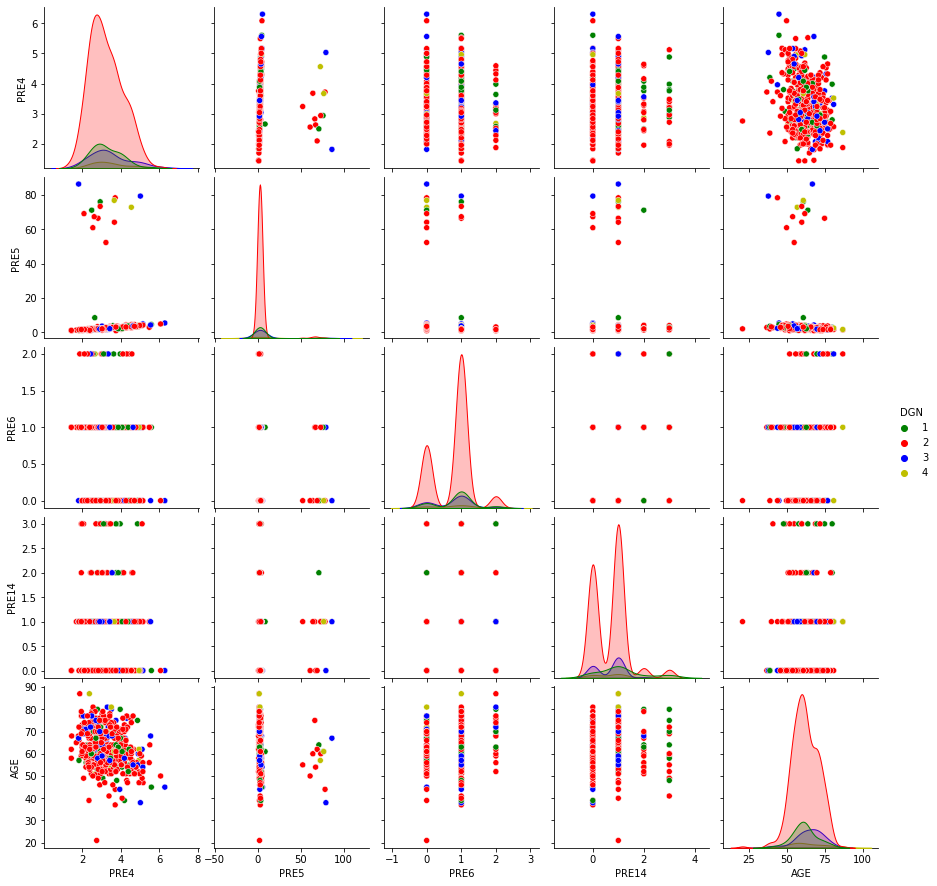

In [ ]:
# из двумерных проекций на классы видим, что визуального отличия между классами НЕТ, 
# соответственно уже на этом этапе можно сделать вывод, что хорошего классификатора не получится из этого
# в связи с большим количеством признаков выведены только небинарные

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
sns.pairplot(encoded_data[(encoded_data['DGN']==2) | (encoded_data['DGN']==1) | (encoded_data['DGN']==3) | (encoded_data['DGN']==4)], 
             hue='DGN', 
             vars=['PRE4', 'PRE5', 'PRE6', 'PRE14', 'AGE'],
             palette={2: 'r', 1: 'g', 3: 'b', 4: 'y'})
plt.show()

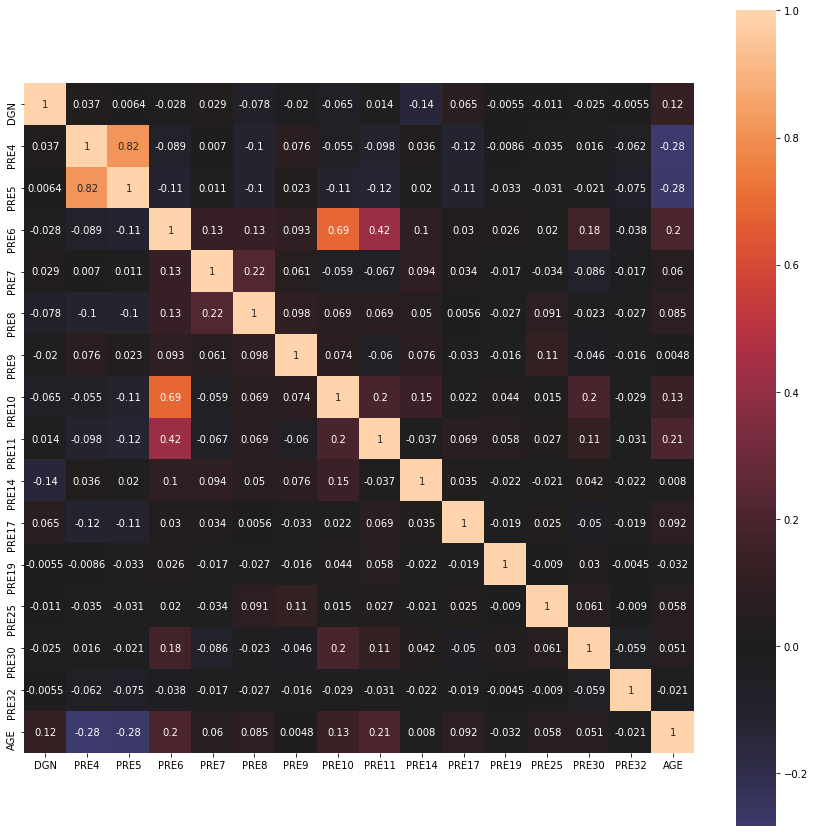

In [ ]:
# рассмотрим матрицу корреляция на данных с исключеним выбросов по переменной PRE5
# сразу наблюдается высокая зависимость переменных PRE4 и PRE5

plt.subplots(figsize=(15,15))
sns.heatmap(encoded_data_cut.corr(), square=True, annot=True, center=0)
plt.show()

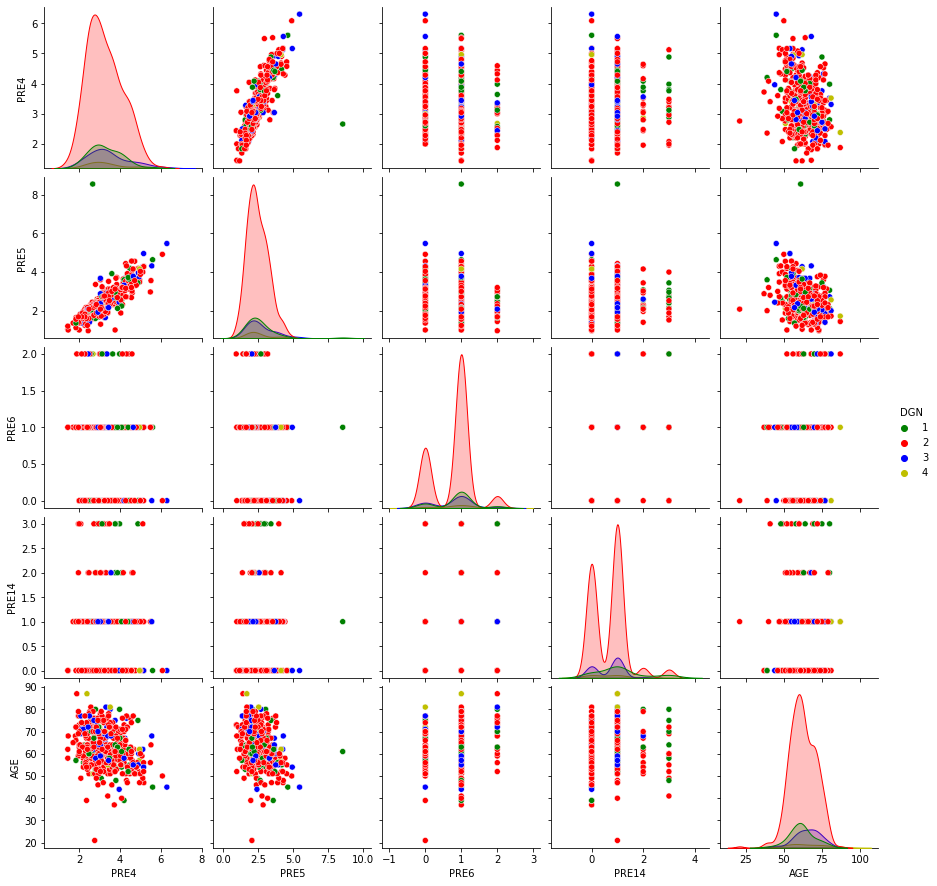

In [ ]:
# построим парные распределения на данных с исключеним выбросов по переменной PRE5
# также видим высокую прямую линейную зависимость PRE4 и PRE5, а также схожие взаимосвязи PRE4 и PRE5 с переменной AGE (точнее ее отсутствие)

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
sns.pairplot(encoded_data_cut[(encoded_data_cut['DGN']==2) | (encoded_data_cut['DGN']==1) | (encoded_data_cut['DGN']==3) | (encoded_data_cut['DGN']==4)], 
             hue='DGN', 
             vars=['PRE4', 'PRE5', 'PRE6', 'PRE14', 'AGE'],
             palette={2: 'r', 1: 'g', 3: 'b', 4: 'y'})
plt.show()

In [ ]:
# принято решение исключить переменную PRE5 из-за высокой взаимосвязи с PRE4, вместе с этим оставляем наблюдения, которые были выбросами для исключенной переменной

X = encoded_data.drop(['DGN', 'PRE5'], axis=1)
y = encoded_data['DGN'].values

print(X.shape, y.shape)

(463, 14) (463,)


In [ ]:
# df_class = X[y==2]
# df_class.hist(figsize = (15,10))
# plt.subplots_adjust(hspace=0.5, wspace=0.2)
# plt.show()

# encoded_data[encoded_data['PRE25']==1]

In [ ]:
X.head()

,PRE4,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE
0,2.88,1,0,0,0,1,1,3,0,0,0,1,0,60
1,3.40,0,0,0,0,0,0,1,0,0,0,1,0,51
2,2.76,1,0,0,0,1,0,0,0,0,0,1,0,59
3,3.68,0,0,0,0,0,0,0,0,0,0,0,0,54
4,2.44,2,0,1,0,1,1,0,0,0,0,1,0,73


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN

In [ ]:
def create_polinomial(X, degree = 2):
  return PolynomialFeatures(degree).fit_transform(X)

def aug_data(X, y):
  try:
    X, y = ADASYN().fit_resample(np.array(X), np.array(y))
  except:
    pass    
  return X, y

# Функция отрисовки графиков
def grid_plot(x, y, x_label, title, y_label='cross_val'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)  

In [ ]:
# нормируем данные

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=100, stratify=y)

print(f'X_train: {X_train.shape} \nX_test: {X_test.shape} \ny_train: {y_train.shape} \ny_test: {y_test.shape}\n')
print(f'y_train:\n{pd.Series(y_train).value_counts()}\n')
print(f'y_test:\n{pd.Series(y_test).value_counts()}')

X_train: (347, 14) 
X_test: (116, 14) 
y_train: (347,) 
y_test: (116,)

y_train:
2    262
1     39
3     35
4     11
dtype: int64

y_test:
2    87
1    13
3    12
4     4
dtype: int64


In [ ]:
# проводим аугментацию тренировочного датасета, поскольку очень большая несбалансированность классов

X_aug, y_aug = aug_data(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pd.Series(y_aug).value_counts()

1    269
2    262
4    260
3    251
dtype: int64

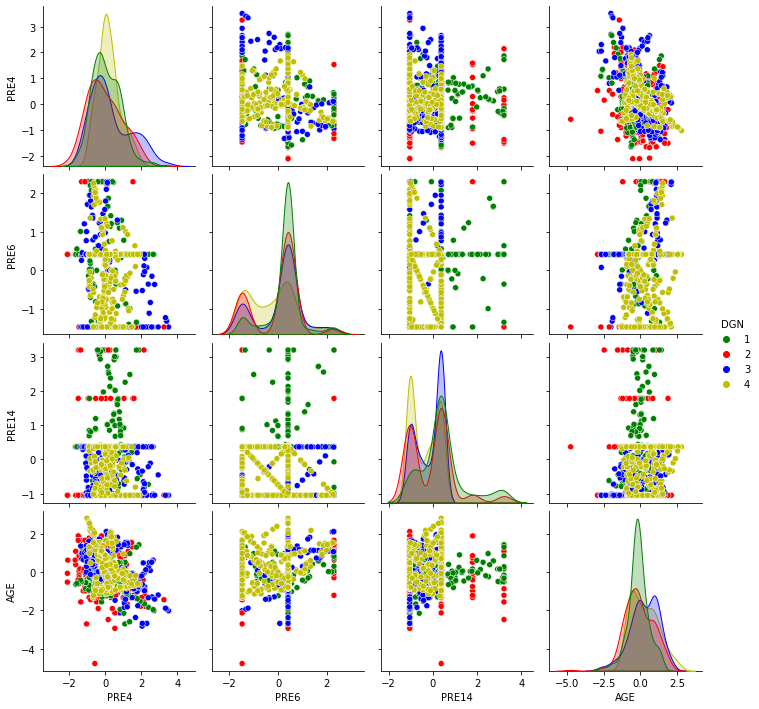

In [ ]:
# выведем парные распределения аугментированных данных: очень странные картинки получаются, особенно по минимальному 4-му классу :)

data_aug = pd.concat([pd.DataFrame(X_aug, columns=X.columns), pd.Series(y_aug, name='DGN')], axis=1)

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
sns.pairplot(data_aug, 
             hue='DGN', 
             vars=['PRE4', 'PRE6', 'PRE14', 'AGE'],
             palette={2: 'r', 1: 'g', 3: 'b', 4: 'y'})
plt.show()

#KNN

In [ ]:
knn = KNeighborsClassifier()

grid = {'n_neighbors': np.array(np.arange(2, 11), dtype='int')}
gs = GridSearchCV(knn, grid, cv=5)

In [ ]:
gs.fit(X_aug, y_aug)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

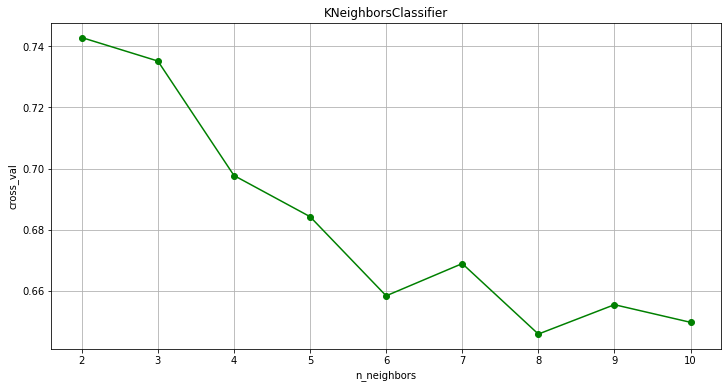

In [ ]:
grid_plot(grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

In [ ]:
gs.best_params_, gs.best_score_

({'n_neighbors': 2}, 0.7428413691571587)

In [ ]:
knn = KNeighborsClassifier(**gs.best_params_)
clf_knn = knn.fit(X_aug, y_aug)

In [ ]:
# можно сказать, рандомный классификатор получился, минимальный класс вообще не определился ни разу

y_knn = clf_knn.predict(X_test)
print(metrics.classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           1       0.17      0.38      0.23        13
           2       0.76      0.60      0.67        87
           3       0.13      0.17      0.15        12
           4       0.00      0.00      0.00         4

    accuracy                           0.51       116
   macro avg       0.27      0.29      0.26       116
weighted avg       0.61      0.51      0.54       116



#Логистическая регрессия

In [ ]:
# логистическая регрессия с автобалансировкой классов: качество хуже, чем в KNN

logreg_bal = LogisticRegression(class_weight = 'balanced')
logreg_bal.fit(X_train, y_train)
logreg_bal_pred = logreg_bal.predict(X_test)
print(metrics.classification_report(y_test, logreg_bal_pred))

              precision    recall  f1-score   support

           1       0.27      0.54      0.36        13
           2       0.78      0.32      0.46        87
           3       0.09      0.25      0.14        12
           4       0.00      0.00      0.00         4

    accuracy                           0.33       116
   macro avg       0.29      0.28      0.24       116
weighted avg       0.62      0.33      0.40       116



In [ ]:
# логистическая регрессия на аугментированных данных с дефолтной L2-регуляризацией и C=1

logreg = LogisticRegression()
logreg.fit(X_aug, y_aug)
logreg_pred = logreg.predict(X_test)
print(metrics.classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           1       0.17      0.38      0.23        13
           2       0.68      0.22      0.33        87
           3       0.09      0.25      0.13        12
           4       0.00      0.00      0.00         4

    accuracy                           0.23       116
   macro avg       0.23      0.21      0.17       116
weighted avg       0.54      0.23      0.29       116



In [ ]:
# логистическая регрессия на аугментированных данных с L1-регуляризацией и подобранным через Gridsearch C

logreg = LogisticRegression(penalty="l1", solver='liblinear')
grid = {'C' : np.array(np.linspace(0.1, 10, 100), dtype='float')} 
gs = GridSearchCV(logreg, grid, cv=5)
gs.fit(X_aug, y_aug)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([ 0.1,  0.2,  0.3,  0....
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5, 

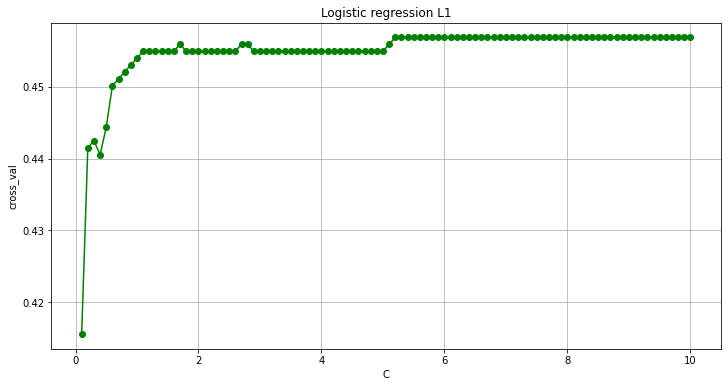

In [ ]:
grid_plot(grid['C'], gs.cv_results_['mean_test_score'], 'C', 'Logistic regression L1')

In [ ]:
gs.best_params_, gs.best_score_

({'C': 5.2}, 0.4568457857931542)

In [ ]:
logreg = LogisticRegression(C=gs.best_params_['C'], penalty="l1", solver='liblinear')
clf_logreg = logreg.fit(X_aug, y_aug)

In [ ]:
y_logreg = clf_logreg.predict(X_test)
print(metrics.classification_report(y_test, y_logreg))

              precision    recall  f1-score   support

           1       0.21      0.54      0.30        13
           2       0.77      0.20      0.31        87
           3       0.09      0.25      0.13        12
           4       0.00      0.00      0.00         4

    accuracy                           0.23       116
   macro avg       0.27      0.25      0.19       116
weighted avg       0.61      0.23      0.28       116



### Полиномиальные признаки

In [ ]:
n = 2
X_train_pol = create_polinomial(X_train, n)
X_test_pol = create_polinomial(X_test, n)

X_aug_pol, y_aug = aug_data(X_train_pol, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pd.Series(y_aug).value_counts()

1    269
2    262
4    260
3    257
dtype: int64

In [ ]:
X_aug_pol.shape, y_aug.shape

((1048, 120), (1048,))

In [ ]:
logreg_pol = LogisticRegression(penalty="l1", solver='liblinear')
grid = {'C' : np.array(np.linspace(0.1, 10, 20), dtype='float')} 
gs = GridSearchCV(logreg_pol, grid, cv=5)
gs.fit(X_aug_pol, y_aug)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([ 0.1       ,  0.62105263,  1.14210526,  1.66315789,  2.18421053,
        2.70526316,  3.22631579,  3.74736842,  4.26842105,  4.78947368,
        5.31052632,  5.83157895,  6.35263158,  6.87368421,  7.39473684,
        7.91578947,  8.43684211,  8.95789474,  9.47894737, 10.        ])},
             pre_dispatch='

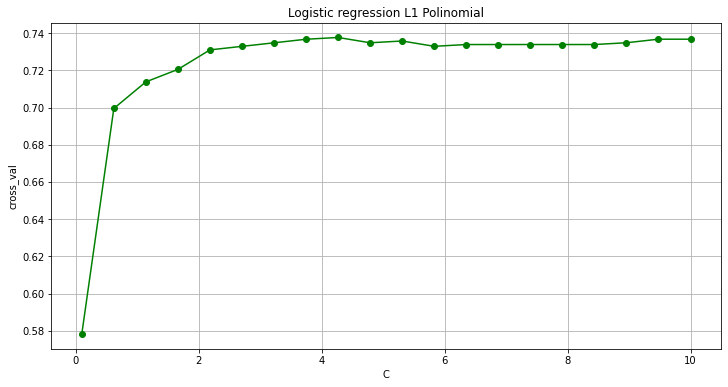

In [ ]:
grid_plot(grid['C'], gs.cv_results_['mean_test_score'], 'C', 'Logistic regression L1 Polinomial')

In [ ]:
gs.best_params_, gs.best_score_

({'C': 4.268421052631579}, 0.7376577808156755)

In [ ]:
logreg_pol = LogisticRegression(C=gs.best_params_['C'], penalty="l1", solver='liblinear')
clf_logreg_pol = logreg_pol.fit(X_aug_pol, y_aug)

In [ ]:
y_logreg_pol = clf_logreg_pol.predict(X_test_pol)
print(metrics.classification_report(y_test, y_logreg_pol))

              precision    recall  f1-score   support

           1       0.12      0.23      0.16        13
           2       0.76      0.43      0.54        87
           3       0.18      0.50      0.27        12
           4       0.00      0.00      0.00         4

    accuracy                           0.40       116
   macro avg       0.26      0.29      0.24       116
weighted avg       0.60      0.40      0.45       116



#SVM

In [ ]:
X_aug, y_aug = aug_data(X_train, y_train)
print(X_aug.shape, y_aug.shape)

(1042, 14) (1042,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
svm = SVC()
grid = {'C' : np.array(np.linspace(0.1, 5, 10), dtype='float'),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],} 
gs = GridSearchCV(svm, grid, cv=5)
gs.fit(X_aug, y_aug)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1       , 0.64444444, 1.18888889, 1.73333333, 2.27777778,
       2.82222222, 3.36666667, 3.91111111, 4.45555556, 5.        ]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
gs.best_params_, gs.best_score_

({'C': 5.0, 'kernel': 'rbf'}, 0.7524475524475525)

In [ ]:
svm = SVC(**gs.best_params_)
clf_svm = svm.fit(X_aug, y_aug)

In [ ]:
y_svm = clf_svm.predict(X_test)
print(metrics.classification_report(y_test, y_svm))

              precision    recall  f1-score   support

           1       0.16      0.23      0.19        13
           2       0.79      0.55      0.65        87
           3       0.19      0.50      0.28        12
           4       0.00      0.00      0.00         4

    accuracy                           0.49       116
   macro avg       0.28      0.32      0.28       116
weighted avg       0.63      0.49      0.54       116



## Оценка репрезентативности данных

In [ ]:
results = dict()

for i in range(30):
    train_size = 0.75    
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=1-train_size, stratify=y)
    
    # аугментация
    X_train, y_train = aug_data(X_train, y_train)
    # алгоритмы
    alg = KNeighborsClassifier()
    grid = {'n_neighbors': np.array(np.arange(2, 11), dtype='int')}
    gs = GridSearchCV(alg, grid, cv=5)
    gs.fit(X_train, y_train)
    
    y_pred = KNeighborsClassifier(**gs.best_params_).fit(X_train, y_train).predict(X_test)
    result = metrics.accuracy_score(y_test, y_pred)    
   
    results[i] = [gs.best_score_, result]    

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
results

{0: [0.7412322274881518, 0.49137931034482757],
 1: [0.7617224880382776, 0.5689655172413793],
 2: [0.7810663021189337, 0.4827586206896552],
 3: [0.7218134522482348, 0.4224137931034483],
 4: [0.7060769602035892, 0.4827586206896552],
 5: [0.7389538488794403, 0.5258620689655172],
 6: [0.7576923076923078, 0.5],
 7: [0.6968694463431306, 0.4396551724137931],
 8: [0.757345971563981, 0.4827586206896552],
 9: [0.7309364319890636, 0.3879310344827586],
 10: [0.7645452493793725, 0.47413793103448276],
 11: [0.7161182151479925, 0.47413793103448276],
 12: [0.7073744352909912, 0.49137931034482757],
 13: [0.7581057227796358, 0.5948275862068966],
 14: [0.7306524505287175, 0.47413793103448276],
 15: [0.7547169811320754, 0.4827586206896552],
 16: [0.6935454750620627, 0.4827586206896552],
 17: [0.7478652926021347, 0.43103448275862066],
 18: [0.7480610617452722, 0.4396551724137931],
 19: [0.7179471843945529, 0.47413793103448276],
 20: [0.6824644549763034, 0.5258620689655172],
 21: [0.7062200956937799, 0.4310

In [ ]:
accuracy = np.array(list(results.values()))[:, 1]

{'boxes': [<matplotlib.lines.Line2D at 0x7fda04459748>],
 'caps': [<matplotlib.lines.Line2D at 0x7fda04fa10b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd9f9c9c0b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fda04fa1828>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fda04459080>,
  <matplotlib.lines.Line2D at 0x7fda04fa1c18>]}

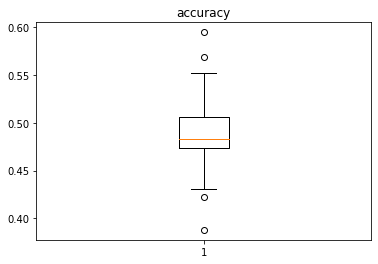

In [ ]:
fig1, ax = plt.subplots()
ax.set_title('accuracy')
ax.boxplot(accuracy)